<a href="https://colab.research.google.com/github/LatiefDataVisionary/scikit-learn-with-indonesia-belajar/blob/main/SKLearn_14_%7C_Support_Vector_Machine_Classification_%7C_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SKLearn 14 | Support Vector Machine Classification | SVM | Belajar Machine Learning Dasar**


## **Dataset: The MNIST database of handwritten digits**

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

In [2]:
y.shape

(70000,)

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


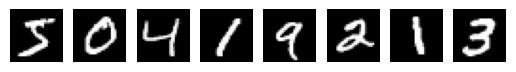

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np # Import numpy

pos = 1
for data in X[:8].values: # Access the underlying numpy array using .values
  plt.subplot(1, 8, pos)
  # Convert the data to float and reshape before displaying
  plt.imshow(data.astype(np.float64).reshape((28, 28)),
             cmap=cm.Greys_r)
  plt.axis('off')
  pos += 1

plt.show()

In [9]:
y[:8]

,class
0,5
1,0
2,4
3,1
4,9
5,2
6,1
7,3


In [11]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# X_train = X[:1000]
# y_train = y[:1000]
# X_test = X[69000:]
# y_test = y[69000:]

## **Classification dengan SVC (Support Vector Classifier)**

In [12]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## **Hyperparameter Tuning dengan GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuraccy')

grid_search.fit(X_train, y_train)

In [ ]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
  print(f'\t{param}: {best_params[param]}')

## **Predict & Evaluate**

In [ ]:
y_pred = grid_reason.predict(X_test)

print(classification_report(y_test, y_pred))